In [56]:
%matplotlib inline

from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
import numpy as np
import os, imageio
import pickle
import torch
import cv2
import umap
import pandas as pd
import pickle 
import gc

### Model

In [3]:
gc.collect()

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
with open("../data/labels", 'rb') as fp:
    targets = pickle.load(fp)

with open('../data/weights_dictionary.pkl', 'rb') as fp:
    weights = pickle.load(fp)

In [28]:
# weights_pd = pd.DataFrame.from_dict(weights)
# weights_pd['digit'] = pd.Series(targets).map(lambda x: 'Digit {}'.format(x))

In [22]:
weights_array = np.array(tuple(weights.values()))

In [25]:
reducer = umap.UMAP(random_state=42)

In [3]:
def plot_fig(embed,tg,f_no): 

    plt.figure(figsize=[25,10])
    plt.scatter(
        embed[:, 0],
        embed[:, 1],
        c=tg
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the MNIST dataset', fontsize=24)
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.scatter(embed[9999,0], embed[9999,1],color='r')
    plt.savefig("figpath/{}.png".format(f_no))

In [4]:
def plot_embedding(interval=19):

    for i in range(interval):

        embedding = reducer.fit_transform(np.delete(weights_array,np.s_[500+i:-1],1))

        plot_fig(embedding,targets,500+i)

    embedding = reducer.fit_transform(np.delete(weights_array,np.s_[9049+i:-1],1))
    plot_fig(embedding,targets,9049)


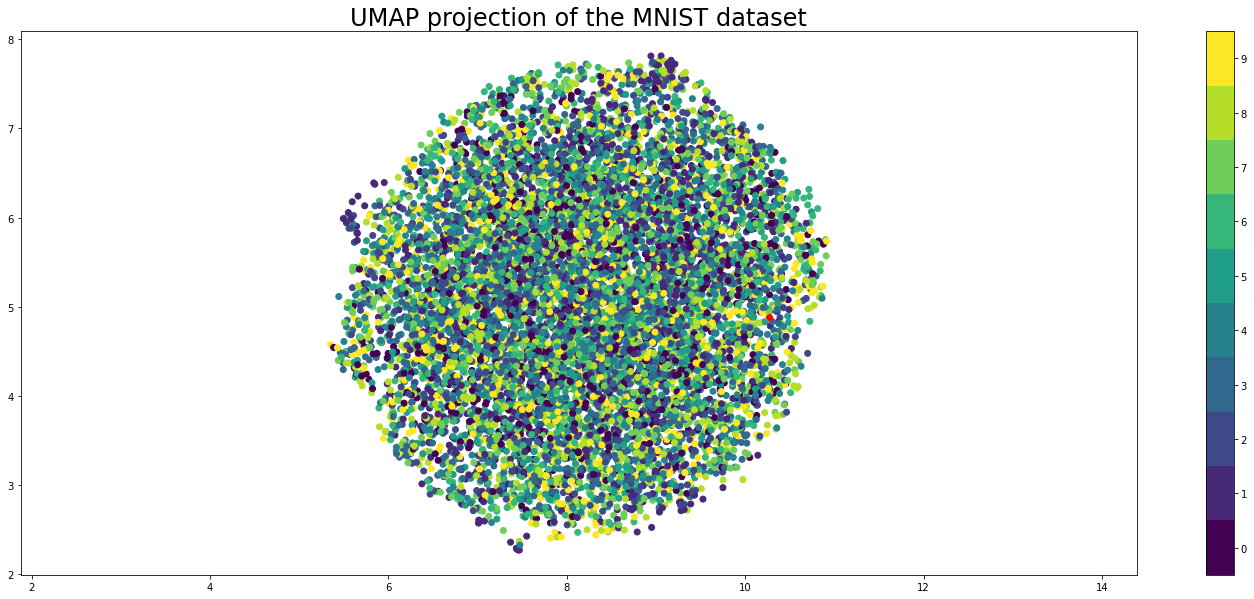

In [54]:
# import seaborn as sns

# plt.figure(figsize=[25,10])
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=targets
# )
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the MNIST dataset', fontsize=24)
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.scatter(embedding[9999,0], embedding[9999,1],color='r')
# plt.show()